## Overview

This notebook allows to follow all the processing perfromed in the Behavioral_Analysis notebook ( which run behavioral_analysis functions)
It sometimes try to clarify some potential complications


In [1]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #Creation de graphiques et de visualisations comme matlab
from matplotlib.patches import Polygon #Creation de graphiques et de visualisations comme matlab
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from scipy.ndimage import gaussian_filter as smooth
#import gc
import glob
#import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING


In [2]:
# the path_to_data_folder is the path of the folder where you store your different mice.

# Windows:
# path_to_data_folder='C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# Linux:
# path_to_data_folder '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
# MacOs
path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

#path_to_data_folder='/home/david/Documents/David/Data/'
#path_to_data_folder='/LocalData/ForagingMice/JAK2Data'
pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")
#path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

# List all mice in the data folder (If you want to process all the mice in your data folder),
mice_list = [os.path.basename(path) for path in glob.glob(pattern_of_MOU_Folders)]
mice_list=sorted(mice_list)
print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')


#If you want to process a subset of mice uncomment the line below and comment the 2 lines above

#mice_list: list[str] = ["MOU2334"]  # For processing  a single mice. Equivalent to mice_list = ["MOU2334"] but more correct as it forces to create a list of string
#mice_list=['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']
#print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions:')
    print(session_list[mouse], '\n')








Found 8 mice in the data folder:
Hello, I'm MOU2329! I have foraged for 22 sessions:
['MOU2329_20240607-1315', 'MOU2329_20240607-1714', 'MOU2329_20240610-0936', 'MOU2329_20240610-1336', 'MOU2329_20240611-0915', 'MOU2329_20240611-1324', 'MOU2329_20240612-0918', 'MOU2329_20240612-1341', 'MOU2329_20240613-0914', 'MOU2329_20240613-1405', 'MOU2329_20240614-0820', 'MOU2329_20240614-1331', 'MOU2329_20240617-0829', 'MOU2329_20240617-1420', 'MOU2329_20240618-0829', 'MOU2329_20240618-1451', 'MOU2329_20240619-0828', 'MOU2329_20240619-1406', 'MOU2329_20240620-0821', 'MOU2329_20240620-1339', 'MOU2329_20240621-0829', 'MOU2329_20240621-1425'] 

Hello, I'm MOU2330! I have foraged for 22 sessions:
['MOU2330_20240607-1335', 'MOU2330_20240607-1733', 'MOU2330_20240610-0956', 'MOU2330_20240610-1357', 'MOU2330_20240611-0936', 'MOU2330_20240611-1342', 'MOU2330_20240612-0937', 'MOU2330_20240612-1400', 'MOU2330_20240613-0933', 'MOU2330_20240613-1424', 'MOU2330_20240614-0840', 'MOU2330_20240614-1351', 'MOU2330_

We just print the list of mice, the dictionnany of sessions across mice and then we will choose a single mice and single session for illustration purpose

In [3]:
mice_list

['MOU2329',
 'MOU2330',
 'MOU2331',
 'MOU2332',
 'MOU2333',
 'MOU2334',
 'MOU4087',
 'MOU4175']

In [4]:
session_list

{'MOU2329': ['MOU2329_20240607-1315',
  'MOU2329_20240607-1714',
  'MOU2329_20240610-0936',
  'MOU2329_20240610-1336',
  'MOU2329_20240611-0915',
  'MOU2329_20240611-1324',
  'MOU2329_20240612-0918',
  'MOU2329_20240612-1341',
  'MOU2329_20240613-0914',
  'MOU2329_20240613-1405',
  'MOU2329_20240614-0820',
  'MOU2329_20240614-1331',
  'MOU2329_20240617-0829',
  'MOU2329_20240617-1420',
  'MOU2329_20240618-0829',
  'MOU2329_20240618-1451',
  'MOU2329_20240619-0828',
  'MOU2329_20240619-1406',
  'MOU2329_20240620-0821',
  'MOU2329_20240620-1339',
  'MOU2329_20240621-0829',
  'MOU2329_20240621-1425'],
 'MOU2330': ['MOU2330_20240607-1335',
  'MOU2330_20240607-1733',
  'MOU2330_20240610-0956',
  'MOU2330_20240610-1357',
  'MOU2330_20240611-0936',
  'MOU2330_20240611-1342',
  'MOU2330_20240612-0937',
  'MOU2330_20240612-1400',
  'MOU2330_20240613-0933',
  'MOU2330_20240613-1424',
  'MOU2330_20240614-0840',
  'MOU2330_20240614-1351',
  'MOU2330_20240617-0848',
  'MOU2330_20240617-1438',
  'MO

In [5]:
illustration_mouse_folder_path=os.path.join(path_to_data_folder,mice_list[0])
print(illustration_mouse_folder_path)

/Users/davidrobbe/Documents/Science/Data/ForagingMice/MOU2329


In [6]:
illustration_foragiong_session=session_list[mice_list[0]][11]
print(illustration_foragiong_session)

MOU2329_20240614-1331


Some basic information about the foraging environment.

In [9]:
######################################
# maze information
######################################

# Mice have to run around 4 towers to obtain rewards. Rewards are delivered when a mouse switch from one trapeze to another concurrent trapeze

video_resolution = 512, 512 # this gives the resolution in pixel of the video recorded(trajectory of the mice in the maze)  
trapeze_width = 50 # rewards are delivered in the maze around 4 towers,  when mice a switch from one trapze to another



#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     NW    |  |                            |  |     NE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+





#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     SW    |  |                            |  |     SE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+


# We therefore need  the coordinate of the 4 towers and the trapeze. The coordinate are given in the reference frame of the video. 
# The video has a resolution of 512 pixeld in trapeze_width and in height. The point 0,0 is the left top corner.



#those are the coordinate taken directly from one of Maud acquisition code (june 2024) Line222
towers_coordinates = {
    "NW": [[104, 125], [173, 125], [173, 201], [104, 201]],
    "NE": [[330, 120], [400, 120], [400, 200], [330, 200]],
    "SW": [[109, 351], [181, 351], [181, 410], [109, 410]],
    "SE": [[330, 350], [400, 350], [400, 410], [330, 410]]
}

#if used as if the N and S are reversed. This is because openCV has the 0 in the upper left corner. 
# So these coordinate do not work in matplotlib environment where the origine is typically on the botoom left 






NW
[[104, 125], [173, 125], [173, 201], [104, 201]]
138.5 163.0
NE
[[330, 120], [400, 120], [400, 200], [330, 200]]
365.0 160.0
SW
[[109, 351], [181, 351], [181, 410], [109, 410]]
145.0 380.5
SE
[[330, 350], [400, 350], [400, 410], [330, 410]]
365.0 380.0


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_63342/3416805083.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


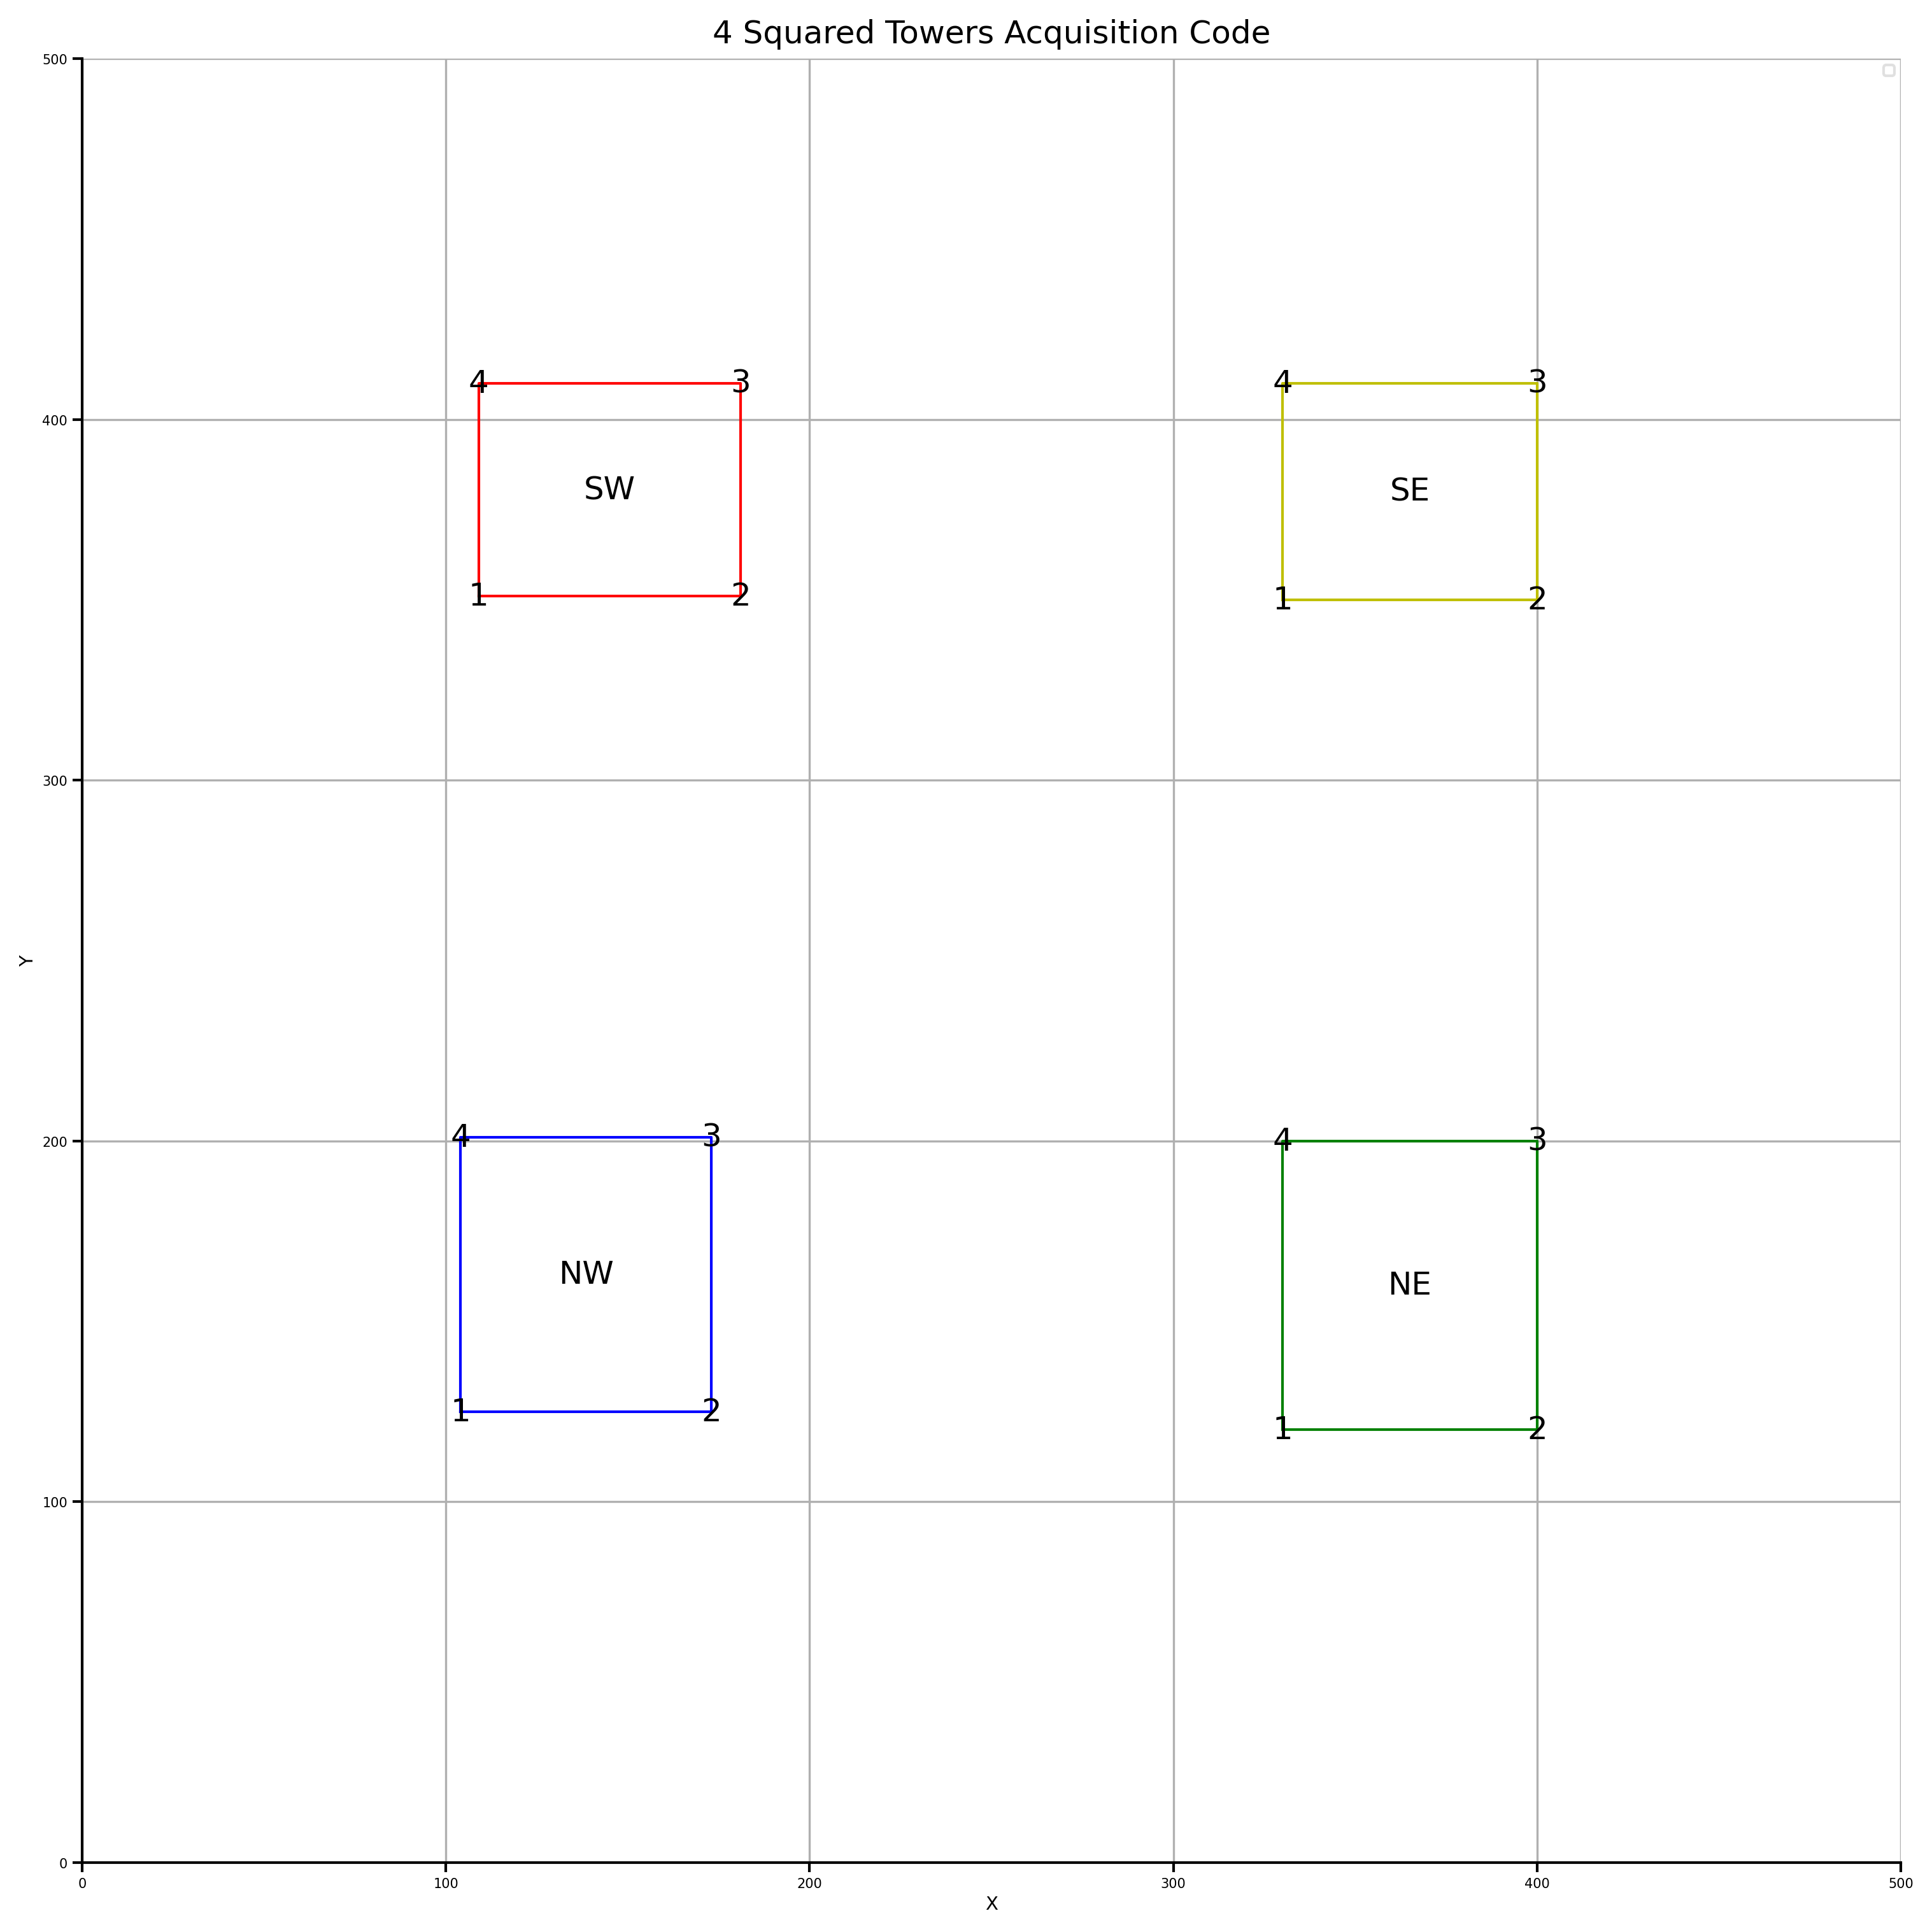

In [11]:
# Function to plot a square tower
def plot_square(vertices, color, label):
    # Close the square polygon by appending the first vertex to the end
    closed_vertices = vertices + [vertices[0]]
    closed_vertices = list(zip(*closed_vertices))  # Transpose vertices for plotting (x, y)
    plt.plot(closed_vertices[0], closed_vertices[1], color)
    print(label)
    print(vertices)
    # Calculate the center of the square for labeling.
    center_x = sum([v[0] for v in vertices]) / 4
    center_y = sum([v[1] for v in vertices]) / 4
    print(center_x,center_y)
    plt.text(center_x, center_y, label, fontsize=12, ha='center', va='center')

    # Plot the number of each corner at its respective coordinates
    for i, (x, y) in enumerate(vertices):
        plt.text(x, y, str(i+1), fontsize=12, ha='center', va='center', color='black')
    

# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates.items():
    plot_square(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Acquisition Code')
plt.grid(True)
plt.legend()

# Display plot
plt.show()


In [12]:
# This the transformation we have to do to get the coordinates right knowing they go from 0 to 512
max_y = video_resolution[1]

# Transform the coordinates to have the origin at the lower left
transformed_towers_coordinates = {
    label: [[x, max_y - y] for x, y in vertices]
    for label, vertices in towers_coordinates.items()
}
print(transformed_towers_coordinates)

{'NW': [[104, 387], [173, 387], [173, 311], [104, 311]], 'NE': [[330, 392], [400, 392], [400, 312], [330, 312]], 'SW': [[109, 161], [181, 161], [181, 102], [109, 102]], 'SE': [[330, 162], [400, 162], [400, 102], [330, 102]]}


NW
[[104, 387], [173, 387], [173, 311], [104, 311]]
138.5 349.0
NE
[[330, 392], [400, 392], [400, 312], [330, 312]]
365.0 352.0
SW
[[109, 161], [181, 161], [181, 102], [109, 102]]
145.0 131.5
SE
[[330, 162], [400, 162], [400, 102], [330, 102]]
365.0 132.0


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_63342/2600717826.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


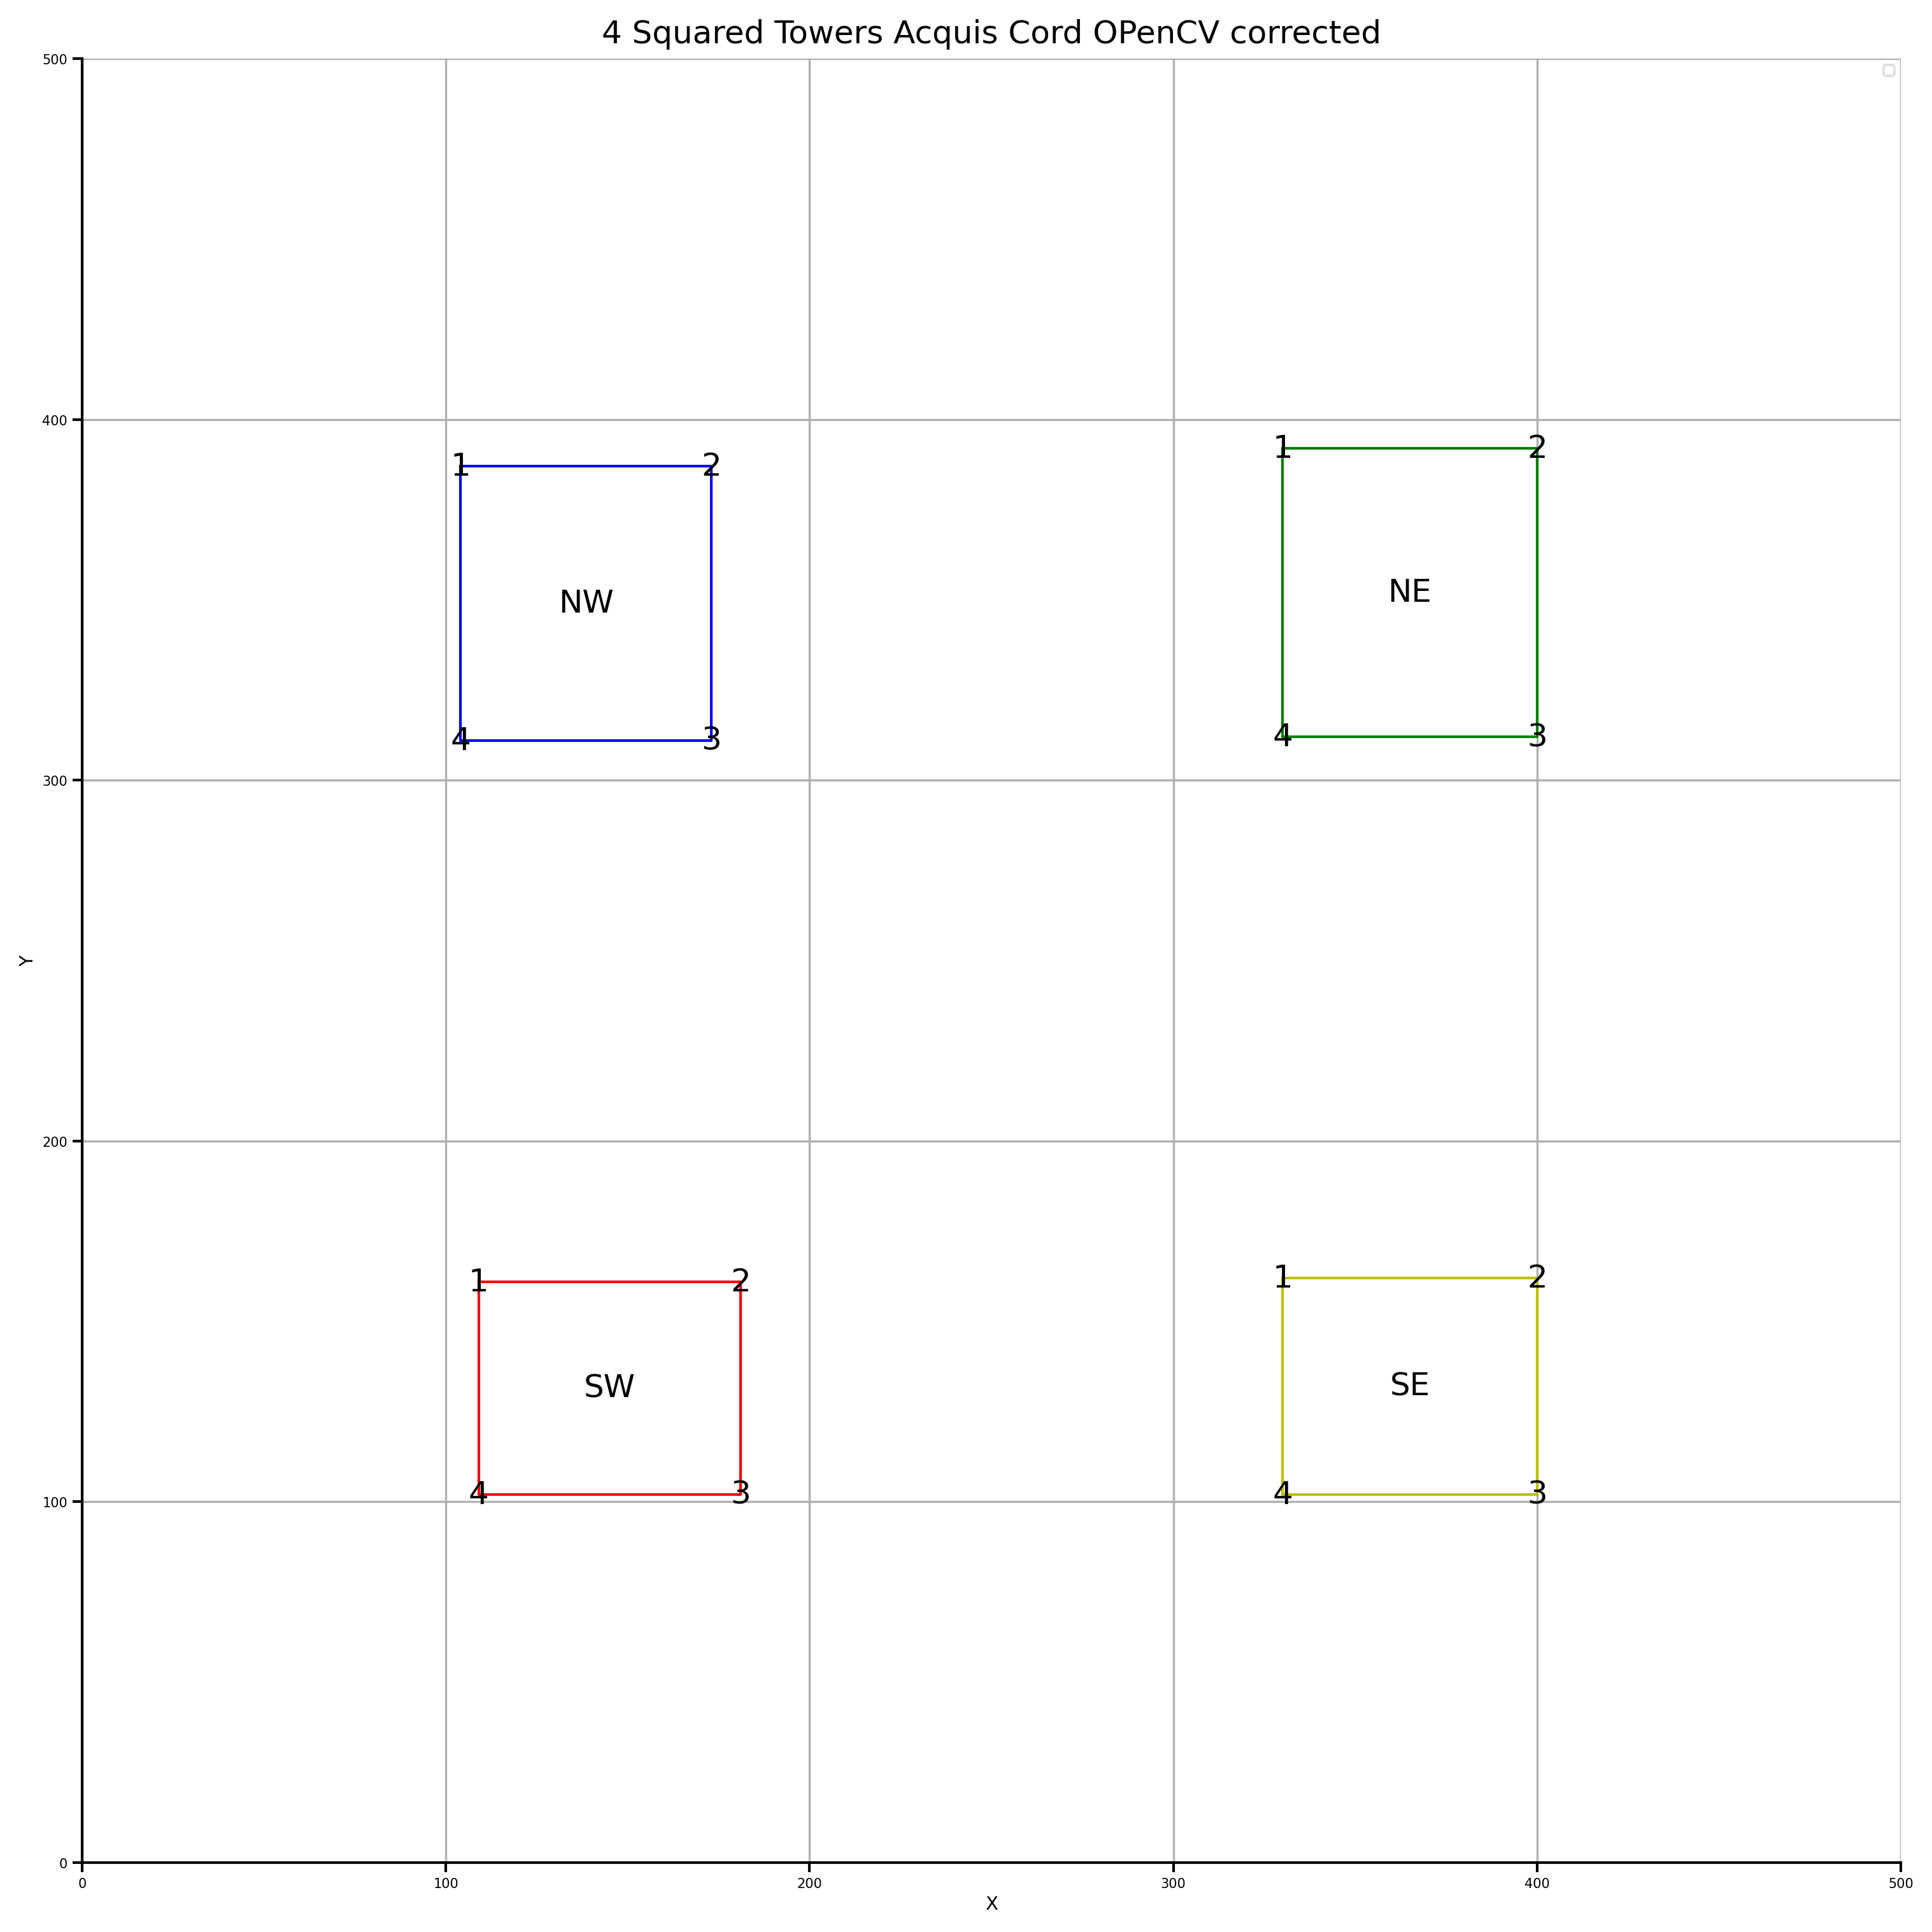

In [13]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in transformed_towers_coordinates.items():
    plot_square(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Acquis Cord OPenCV corrected')
plt.grid(True)
plt.legend()

# Display plot
plt.show()

In [14]:
# now lets do the same with the coordinate in Alice original processing code
#define the coordinates of each patch
video_resolution=512,512
NWpatch_coords = [[104, video_resolution[1] -  125], [173, video_resolution[1] -  125], [173, video_resolution[1] -  201], [104, video_resolution[1] -  201]]
NEpatch_coords = [[330, video_resolution[1] -  120], [400, video_resolution[1] -  120], [400, video_resolution[1] -  200], [330, video_resolution[1] -  200]]
SWpatch_coords = [[109, video_resolution[1] -  351], [181, video_resolution[1] -  351], [181, video_resolution[1] -  410], [109, video_resolution[1] -  410]]
SEpatch_coords = [[330, video_resolution[1] -  350], [400, video_resolution[1] -  350], [400, video_resolution[1] -  410], [330, video_resolution[1] -  410]]
towers_coordinates_alice = {
    "NW": NWpatch_coords,
    "NE": NEpatch_coords,
    "SW": SWpatch_coords,
    "SE": SEpatch_coords,
}

NW
[[104, 387], [173, 387], [173, 311], [104, 311]]
138.5 349.0
NE
[[330, 392], [400, 392], [400, 312], [330, 312]]
365.0 352.0
SW
[[109, 161], [181, 161], [181, 102], [109, 102]]
145.0 131.5
SE
[[330, 162], [400, 162], [400, 102], [330, 102]]
365.0 132.0


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_63342/3231413065.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


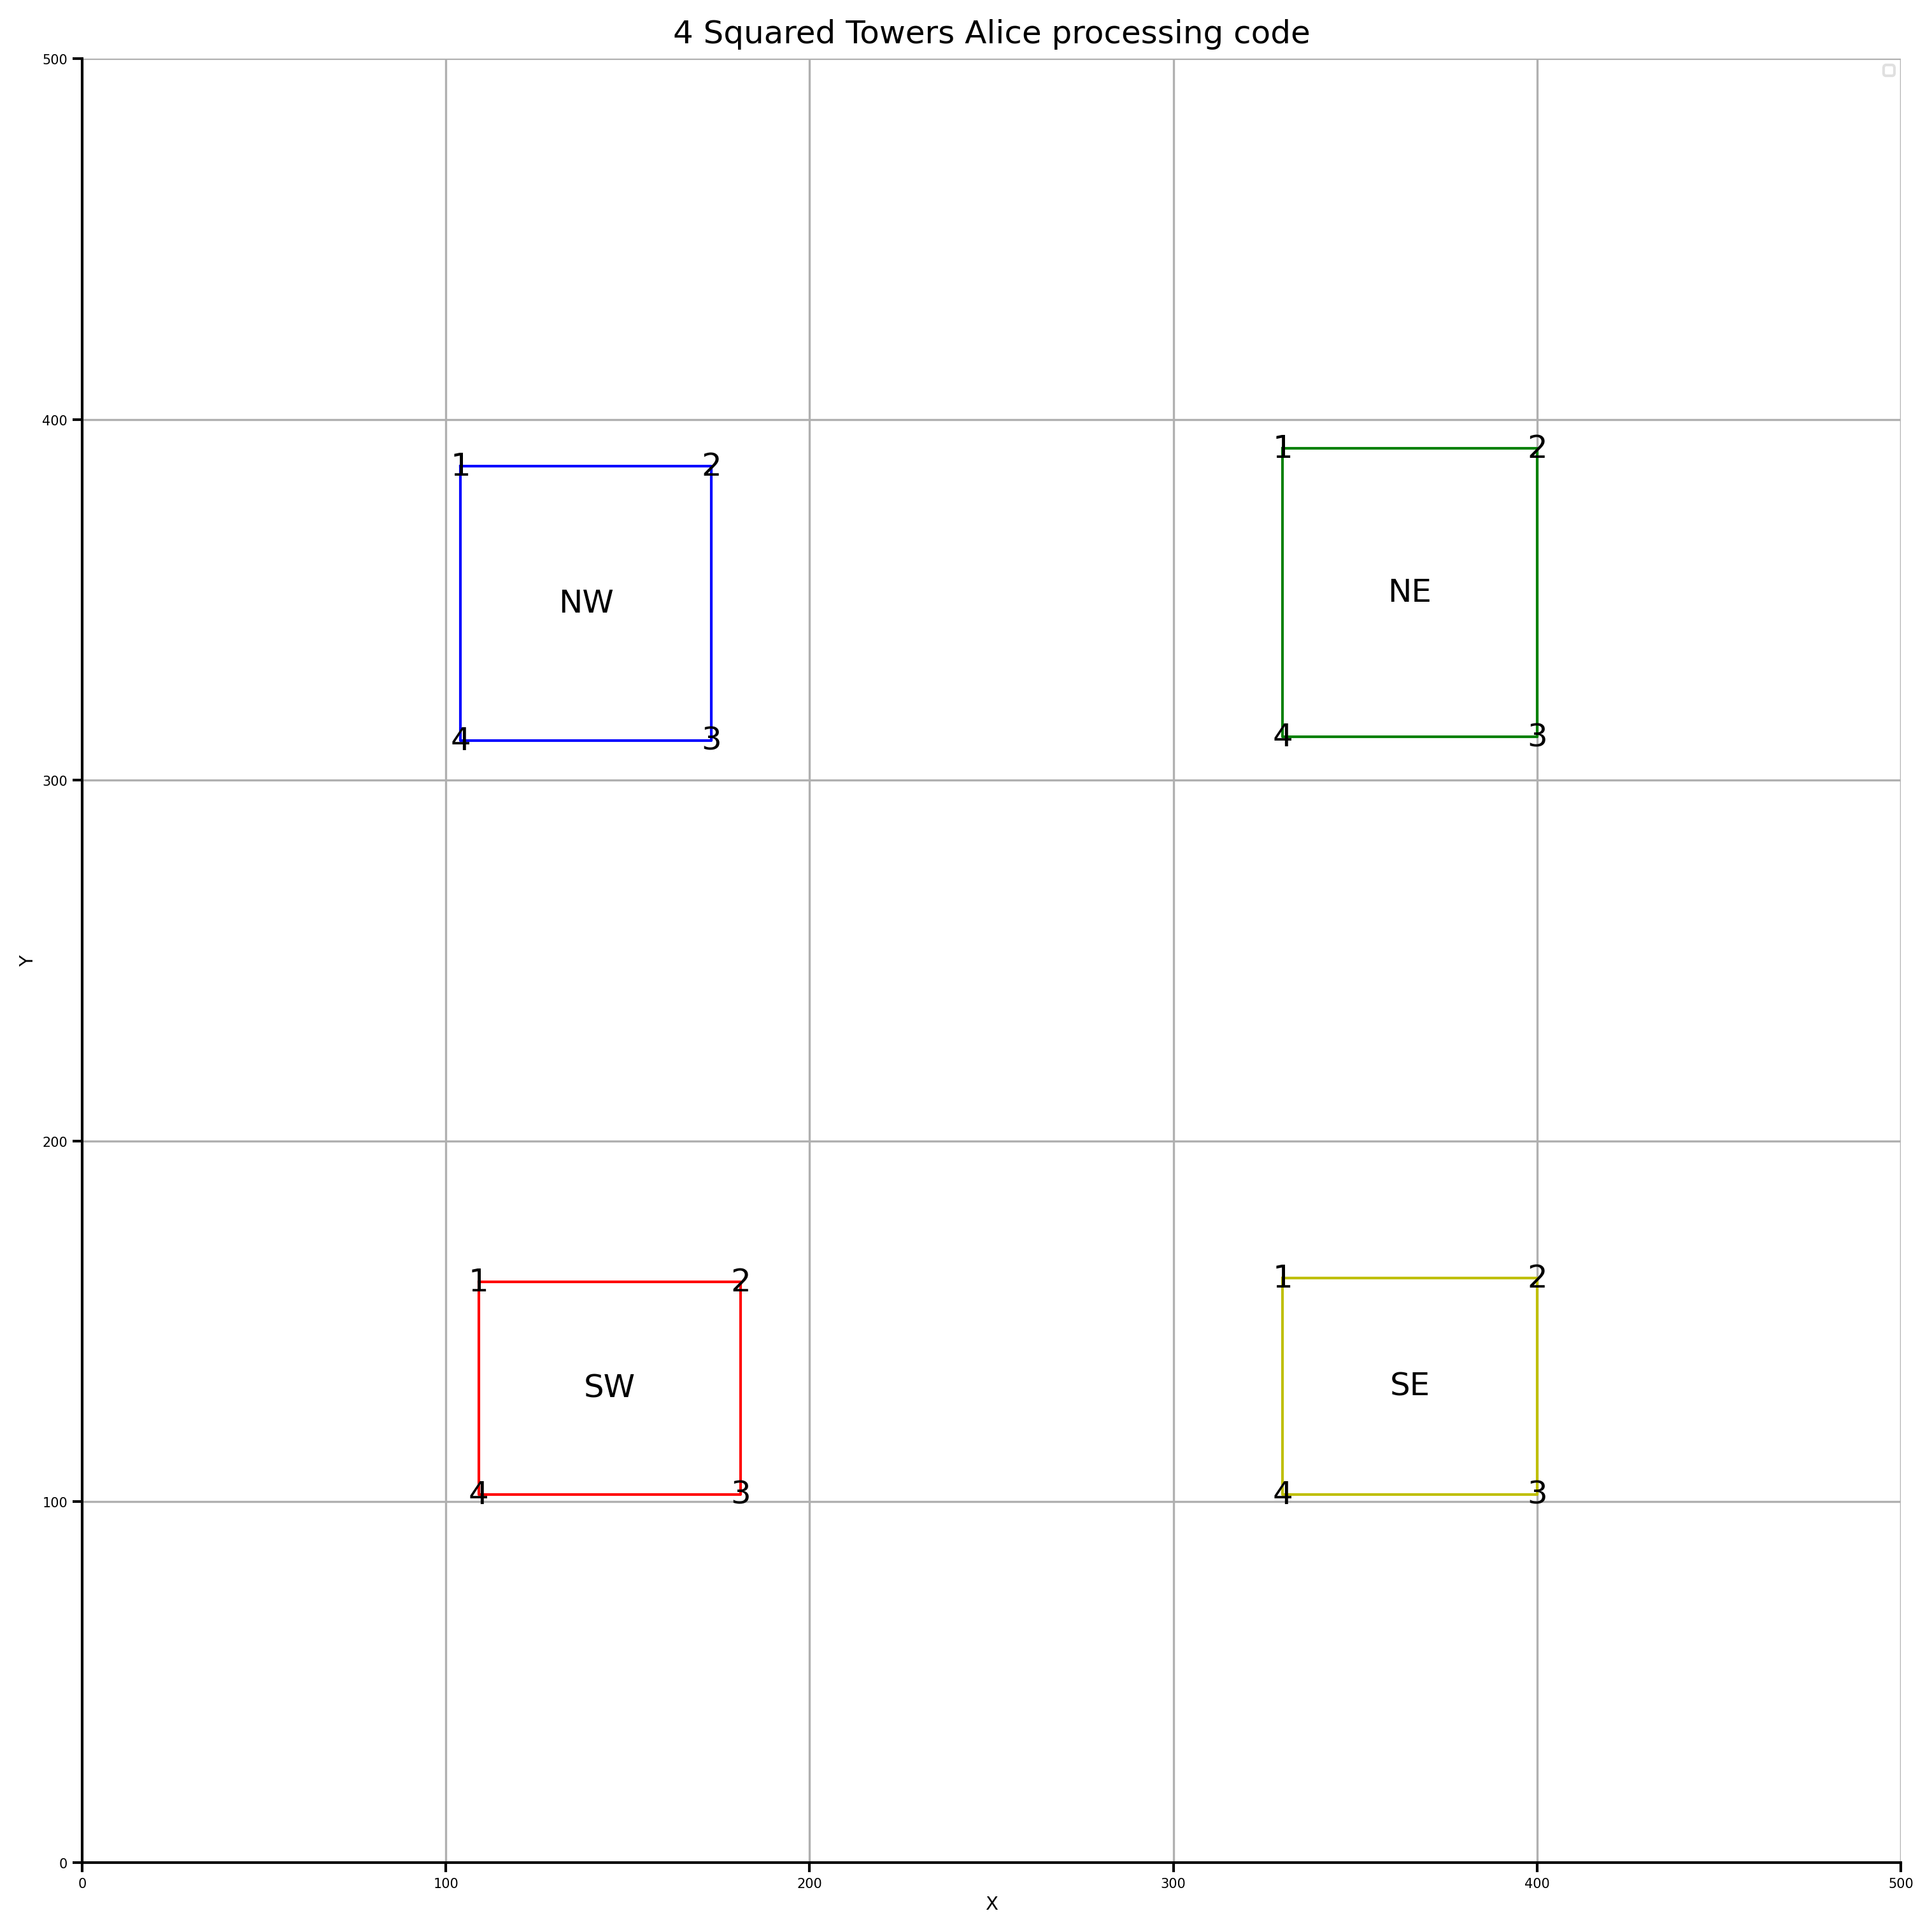

In [15]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates_alice.items():
    plot_square(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Alice processing code')
plt.grid(True)
plt.legend()

# Display plot
plt.show()

{'NW': {'N': [[104, 387], [173, 387], [223, 437], [54, 437]], 'E': [[173, 387], [173, 311], [223, 261], [223, 437]], 'S': [[173, 311], [104, 311], [54, 261], [223, 261]], 'W': [[104, 311], [104, 387], [54, 437], [54, 261]]}, 'NE': {'N': [[330, 392], [400, 392], [450, 442], [280, 442]], 'E': [[400, 392], [400, 312], [450, 262], [450, 442]], 'S': [[400, 312], [330, 312], [280, 262], [450, 262]], 'W': [[330, 312], [330, 392], [280, 442], [280, 262]]}, 'SW': {'N': [[109, 161], [181, 161], [231, 211], [59, 211]], 'E': [[181, 161], [181, 102], [231, 52], [231, 211]], 'S': [[181, 102], [109, 102], [59, 52], [231, 52]], 'W': [[109, 102], [109, 161], [59, 211], [59, 52]]}, 'SE': {'N': [[330, 162], [400, 162], [450, 212], [280, 212]], 'E': [[400, 162], [400, 102], [450, 52], [450, 212]], 'S': [[400, 102], [330, 102], [280, 52], [450, 52]], 'W': [[330, 102], [330, 162], [280, 212], [280, 52]]}}
NW
[[104, 387], [173, 387], [173, 311], [104, 311]]
138.5 349.0
NW N
[[104, 387], [173, 387], [223, 437

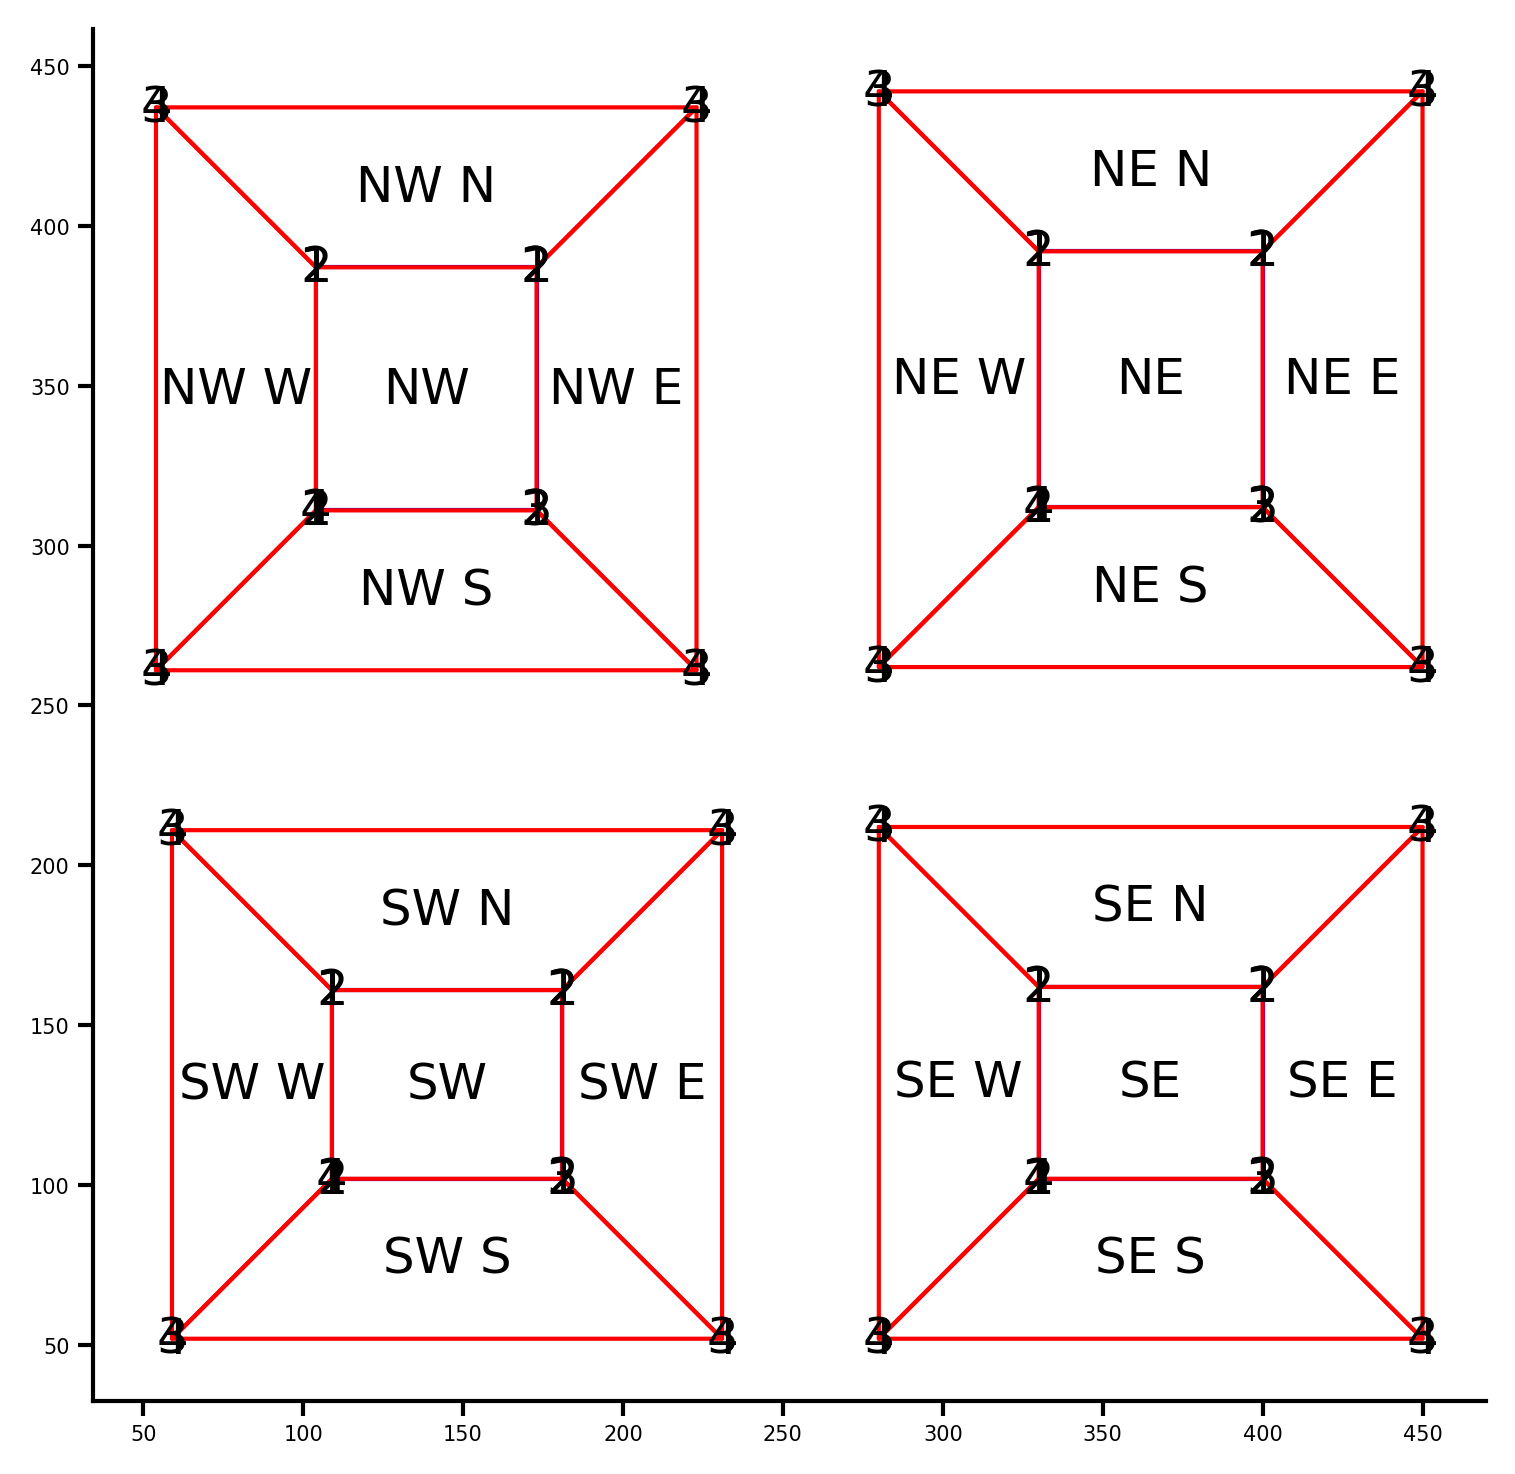

In [16]:
#Now let's plot the trapeze around the tower, knowing their width and the transformed_towers_coordinates


trapeze_width = 50 



def trapeze_coordinates_from_tower(tower_coordinates, trapeze_width):
    """
    generate the trapezes coordinates surrounding a tower
    inputs:
    tower_coordinates - coordinates of the 4 corners of a tower [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    trapeze_width - width of the trapeze in pixels
    outputs:
    coordinates [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]] for the 4 trapezes (N, E, S, W).
    
    
    """

    N = [tower_coordinates[0], tower_coordinates[1], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width]]
    E = [tower_coordinates[1], tower_coordinates[2], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width]]
    S = [tower_coordinates[2], tower_coordinates[3], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width]]
    W = [tower_coordinates[3], tower_coordinates[0], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width]]
    return N, E, S, W


    # N = [patch[0], patch[1], [patch[1][0]+width, patch[1][1]+width], [patch[0][0]-width, patch[0][1]+width]]
    # E = [patch[1], patch[2], [patch[2][0]+width, patch[2][1]-width], [patch[1][0]+width, patch[1][1]+width]]
    # S = [patch[2], patch[3], [patch[3][0]-width, patch[3][1]-width], [patch[2][0]+width, patch[2][1]-width]]
    # W = [patch[3], patch[0], [patch[0][0]-width, patch[0][1]+width], [patch[3][0]-width, patch[3][1]-width]]
    # return N, E, S, W



# Initialize dictionary to store trapeze coordinates
all_trapezes_coordinates = {"NW": {}, "NE": {}, "SW": {}, "SE": {}}

# Iterate over each tower and compute trapeze coordinates
for tower_name, tower_coordinates in transformed_towers_coordinates.items():
    all_trapezes_coordinates[tower_name]["N"], \
    all_trapezes_coordinates[tower_name]["E"], \
    all_trapezes_coordinates[tower_name]["S"], \
    all_trapezes_coordinates[tower_name]["W"] = trapeze_coordinates_from_tower(tower_coordinates, trapeze_width)


print(all_trapezes_coordinates)

# Plot each transformed tower and its trapezes
for label, vertices in transformed_towers_coordinates.items():
    plot_square(vertices, 'blue', label)
    for direction, trapeze in all_trapezes_coordinates[label].items():
        plot_square(trapeze, 'red', f'{label} {direction}')

# Display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



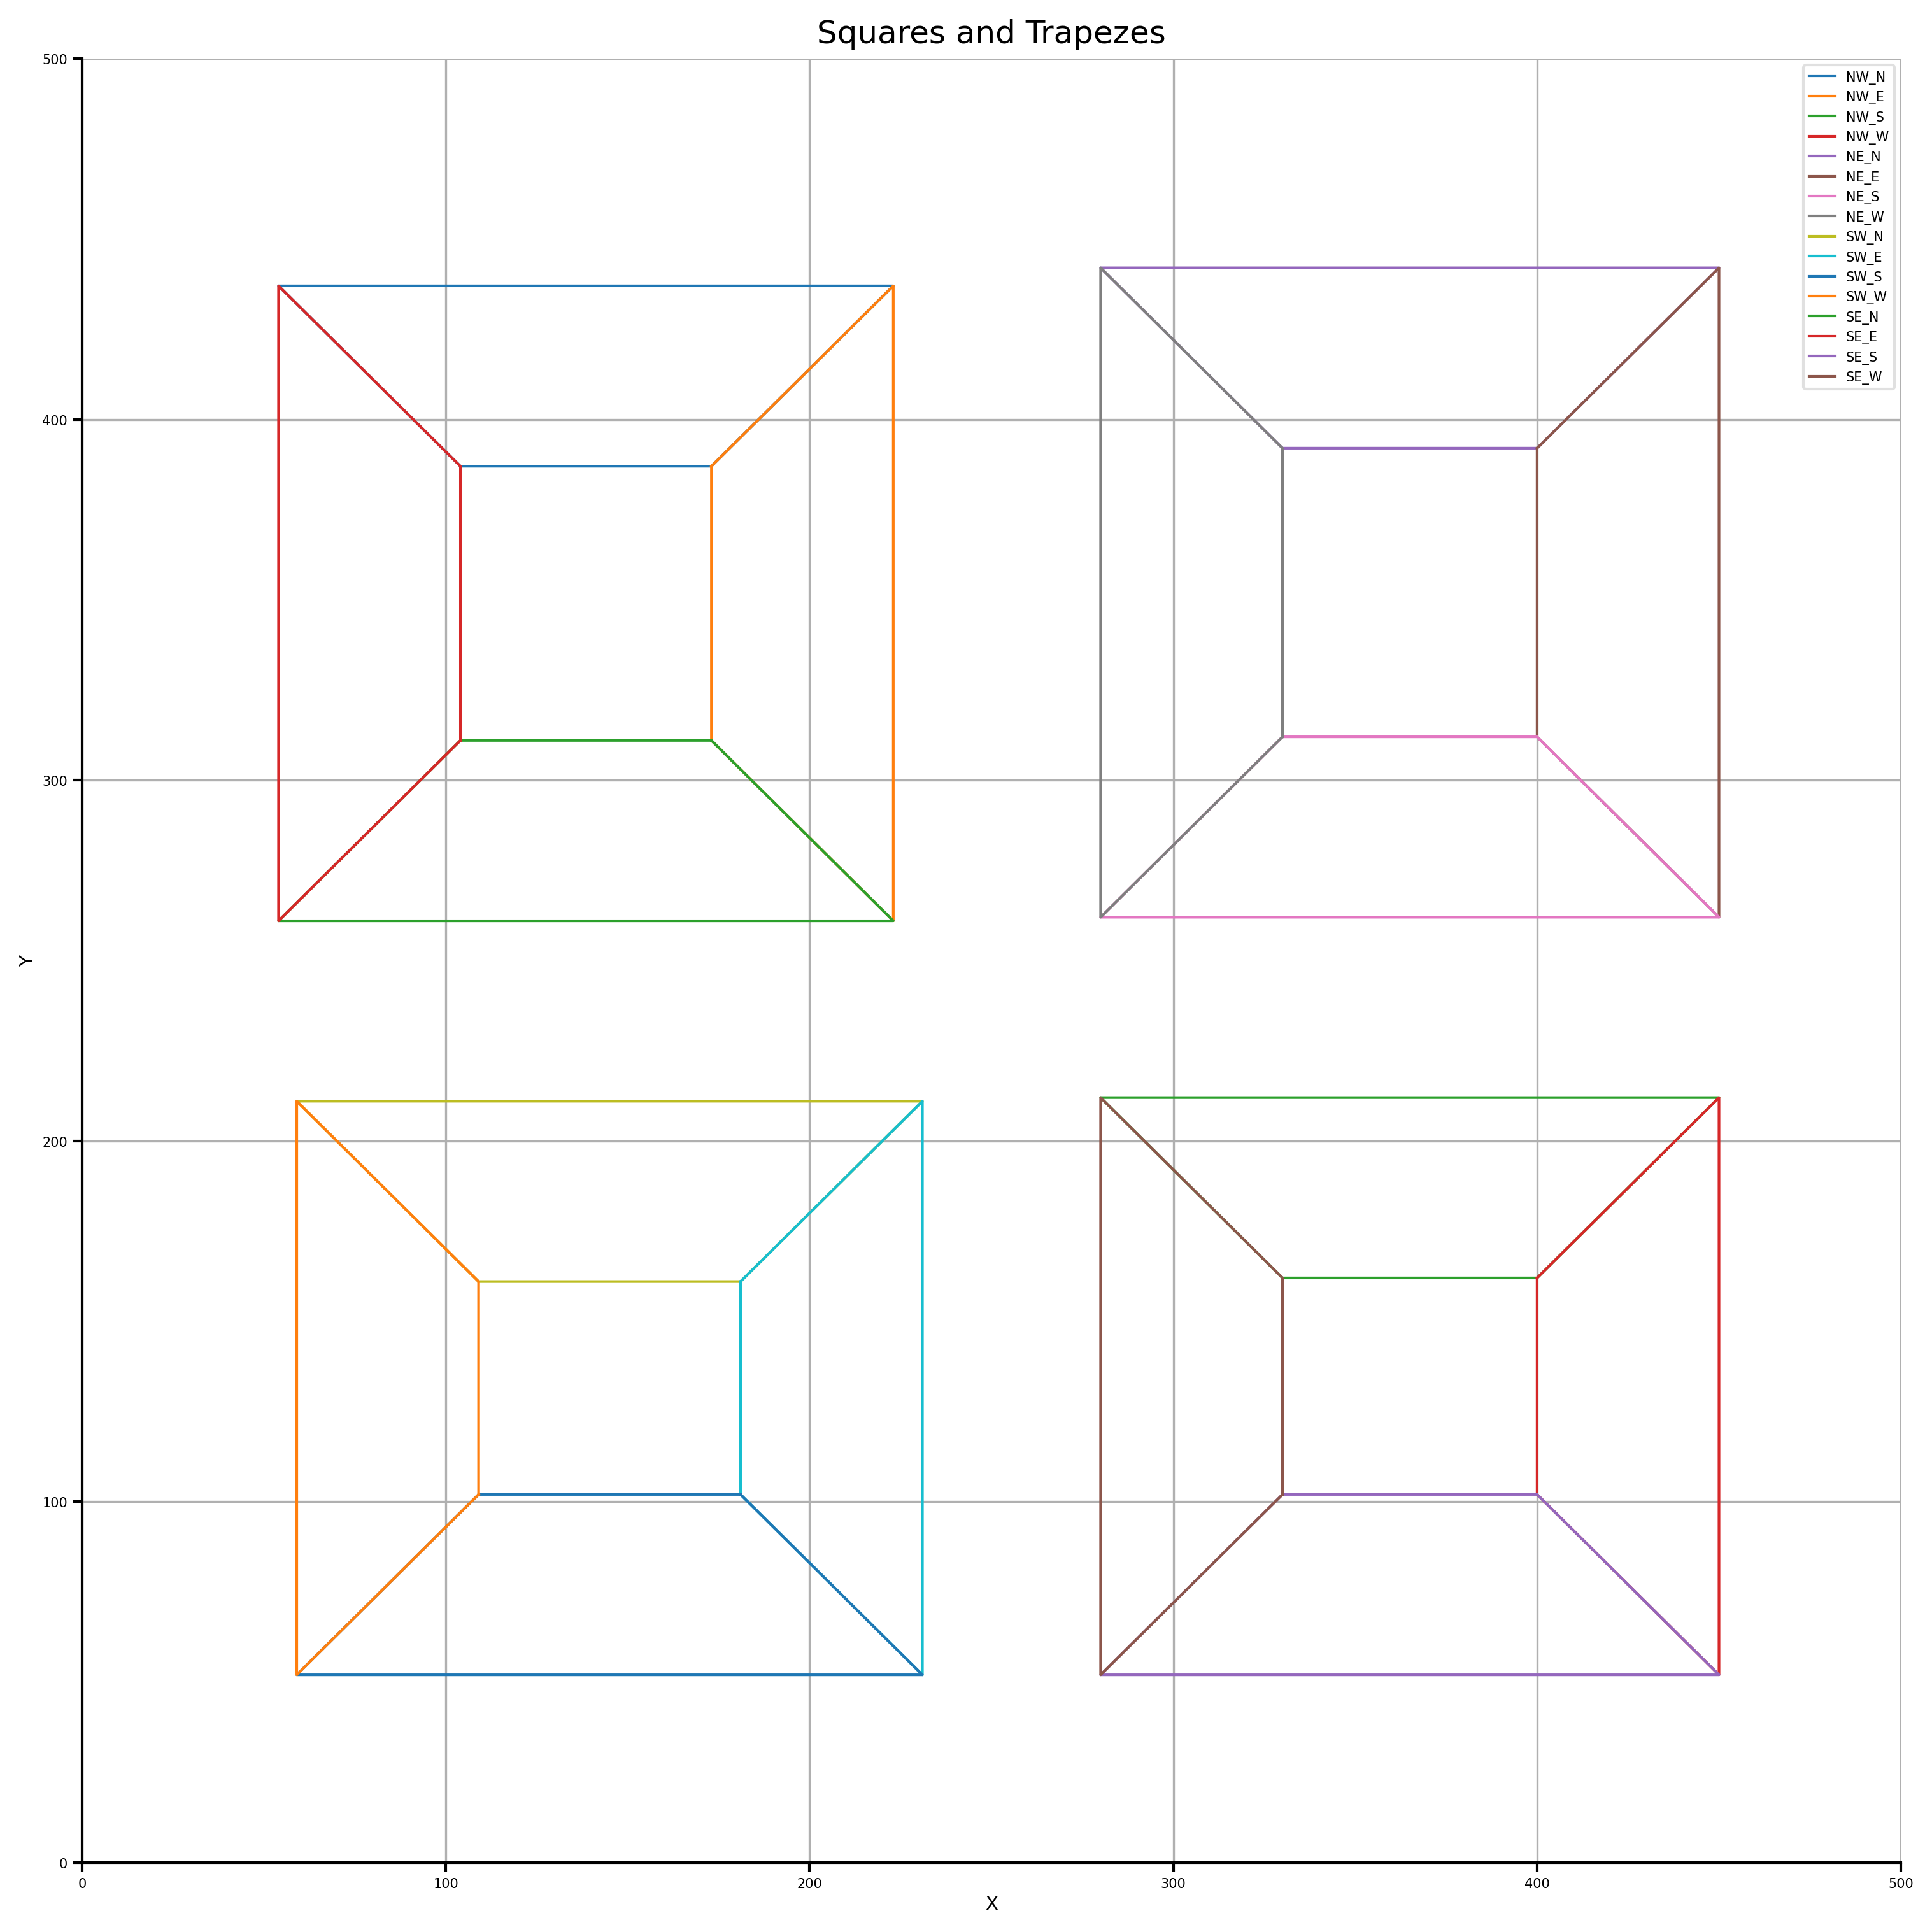

In [17]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Plot each square and trapeze
for tower, trapezes in all_trapezes_coordinates.items():
    for trapeze, coordinates in trapezes.items():
        # Close the polygon by appending the first vertex
        coordinates.append(coordinates[0])
        # Extract x and y coordinates for plotting
        x_coords, y_coords = zip(*coordinates)
        plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Squares and Trapezes')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

### now we're going to go through the processing of the trajectory.
#### first cutting the trajectory in epochs of continuous running.

In [19]:
# we load the trajectory , turn info and parametres info from the csv files
traj_df, turns_df, param_df=load_data(illustration_mouse_folder_path,illustration_foragiong_session)

# correct for some open CV flipping
smooth_sigma = 1 #the sigma used for the remaining of the analysis for smoothing
traject_time = traj_df['time'].to_numpy()
xpositions = traj_df['xposition'].to_numpy()
ypositions = traj_df['yposition'].to_numpy()
ypositions = video_resolution[1] - ypositions # yposition is inverted, puts it back in the right way. DAvid: this is not simply an inversion because resolution is added
# smooth positions
smoothed_Xpositions = smooth(xpositions, smooth_sigma)
smoothed_Ypositions = smooth(ypositions, smooth_sigma) # Smoothes the positions with true sigma

#this function compute the distance and speed in cm and cm/s
def compute_distance_and_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time):
    # Calculate the differences between consecutive points
    delta_x = np.diff(smoothed_Xpositions)
    delta_y = np.diff(smoothed_Ypositions)
    delta_t = np.diff(traject_time)
    
    # Compute the distances traveled between each timepoint
    distances = np.sqrt(delta_x**2 + delta_y**2)
    distances=distances*(84/video_resolution[0]) ##convert pixel into cm
    
    # Compute the speeds between each timepoint
    speeds = distances / delta_t
    
    return distances, speeds


distances, speeds = compute_distance_and_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)

print("Distances:", distances)
print("Speeds:", speeds)



Distances: [7.53995961e-01 1.03442464e+00 1.13601846e+00 ... 7.05145710e-04
 2.19565869e-05 0.00000000e+00]
Speeds: [1.75347898e+01 2.65237086e+01 2.91286784e+01 ... 1.85564661e-02
 5.22775877e-04 0.00000000e+00]


In [20]:
# now lets get the run epcochs

#for this we need some parameters
pause_min_duration = 0.1 #if a stop is shorter than this, merges the two epochs bordering it
run_min_duration = 0.3 #minimal duration of an epoch to be considerd
cut_off_speed = 7 # this value is the speed in cm/s. It is used to detect when the animals stop running. 

trajectory_speeds = np.insert(speeds, 0, 0) # insert a 0 to avoid length error with trajectory times. We consider that
                                            # at the first frame the speed is null

def define_run_epochs(cut_off_speed, trajectory_speeds, trajectory_times, pause_min_duration, run_min_duration):
    """
    Identifies continuous epochs during which the mouse is moving above a certain speed (cut_off_speed).
    A minimal duration of low speed is necessary to be considered as the end of a run.
    Similarly, a minimal duration of high speed is necessary to be considered as a run.
    """
    run_epochs = []
    is_in_epoch = False  # Flag to track if we are currently in a running epoch
    epoch_start_index = 0

    if len(trajectory_speeds) != len(trajectory_times):
        raise ValueError("trajectory_speeds and trajectory_times have different lengths")

    for i in range(len(trajectory_speeds)):
        if trajectory_speeds[i] >= cut_off_speed:  # Speed above cut-off value
            if not is_in_epoch: # if the previous trajectory speed was not part of running epoch then this will be a start of a new epoch
                epoch_start_index = i  # Mark the beginning of a new epoch
                is_in_epoch = True
        else: # the speed of the current data point is below the treshold
            if is_in_epoch: # if we were in a run epoch just before (1st point below the treshold)
                # Check first if the pause between this epoch's starting point (trajectory_times[epoch_start_index]) and  
                # the previous epoch' last point trajectory_times[run_epochs[-1][1]] is shorter than the minimal time for a pause
                # then the previous epoch  should be extended to the previous data point.  
                if run_epochs and (trajectory_times[epoch_start_index] - trajectory_times[run_epochs[-1][1]] < pause_min_duration):
                    run_epochs[-1][1] = i - 1  # Extend the previous epoch
                else: # the pause has been long enough then we terminate the run epoch  other previous 
                    run_epochs.append([epoch_start_index, i - 1, "N", 0])  # Add new epoch
                is_in_epoch = False

    # Final check for any epoch still in progress
    if is_in_epoch:
        if run_epochs and (trajectory_times[epoch_start_index] - trajectory_times[run_epochs[-1][1]] < pause_min_duration):
            run_epochs[-1][1] = len(trajectory_speeds) - 1
        elif (trajectory_times[-1] - trajectory_times[epoch_start_index]) >= run_min_duration:
            run_epochs.append([epoch_start_index, len(trajectory_speeds) - 1, "N", 0])

    # Remove epochs that are too short
    run_epochs = [epoch for epoch in run_epochs if (trajectory_times[epoch[1]] - trajectory_times[epoch[0]]) >= run_min_duration]
    
    # Adjust the start and end of each epoch based on acceleration. The idea is that with the threshold method we miss the beginning and enf of the run
    # for the starting point. We are going back and find the point at wich the animal acceleration is less than 40% 
    # than the acceleration at the moment at which he passed the treshold. 
    clean_run_epochs = [None] * len(run_epochs)
    for index,epoch in enumerate(run_epochs):
        clean_run_epochs[index] = epoch.copy()
        epoch_start, epoch_end = epoch[0], epoch[1]
        # Adjust the start of the epoch
        current_point = epoch_start
        acceleration_at_crossing=(trajectory_speeds[current_point + 1] - trajectory_speeds[current_point]) / (trajectory_times[current_point + 1] - trajectory_times[current_point])
        while current_point > 0:
            previous_acceleration = (trajectory_speeds[current_point] - trajectory_speeds[current_point - 1]) / (trajectory_times[current_point] - trajectory_times[current_point - 1])
            if previous_acceleration <= (0.1 * acceleration_at_crossing) or previous_acceleration <= 0:
                break
            current_point -= 1
            #print(f'it went backward on epoch {index}')
        clean_run_epochs[index][0] = current_point

    #Adjust the end of the epoch
    #We are going forward after the speed crossed downward the speed threshold and find the point at wich the animal acceleration is less than 40% 
    #than the acceleration at the moment at which it passed the treshold. 
        current_point = epoch_end
        acceleration_at_crossing=(trajectory_speeds[current_point - 1] - trajectory_speeds[current_point]) / (trajectory_times[current_point] - trajectory_times[current_point-1])
        while current_point < len(trajectory_speeds) - 1:
            next_acceleration = (trajectory_speeds[current_point] - trajectory_speeds[current_point + 1]) / (trajectory_times[current_point+1] - trajectory_times[current_point])
            if next_acceleration <= (0.1 * acceleration_at_crossing) or next_acceleration <= 0:
                break
            current_point += 1
            #print(f'it went forward on epoch {index}')
        clean_run_epochs[index][1] = current_point

    
   
    return clean_run_epochs,run_epochs


In [21]:
clean_run_epochs,run_epochs = define_run_epochs(cut_off_speed= cut_off_speed, trajectory_speeds = trajectory_speeds, trajectory_times=  traject_time, pause_min_duration= pause_min_duration,
                                     run_min_duration= run_min_duration)

In [26]:
def plot_trajectory_chunk(x, y, trajectory_speeds, run_epochs, clean_run_epochs, cut_off_speed):
    """
    Plots a chunk of trajectory_speeds from index x to index y and visualizes the run_epochs and clean_run_epochs.
    
    Parameters:
        x (int): Start index of the chunk to plot.
        y (int): End index of the chunk to plot.
        trajectory_speeds (list): List of trajectory speeds.
        run_epochs (list): List of original run epochs.
        clean_run_epochs (list): List of adjusted run epochs.
        cut_off_speed (float): The speed threshold for determining run epochs.
    """
    
    plt.figure(figsize=(14, 8))
    
    # Plot trajectory speeds
    plt.plot(range(x, y), trajectory_speeds[x:y], label='Trajectory Speeds', color='blue', marker='o', markerfacecolor='none')
    
    # Plot horizontal line for cut_off_speed
    plt.axhline(y=cut_off_speed, color='orange', linestyle='--', label='Cut-off Speed')
    
    # Plot original run epochs
    for epoch in run_epochs:
        epoch_start, epoch_end = epoch[0], epoch[1]
        if epoch_start >= x and epoch_end <= y:
            plt.axvspan(epoch_start, epoch_end, color='red', alpha=0.3, label='Original Run Epoch' if epoch == run_epochs[0] else "")
    
    # Plot adjusted run epochs
    for epoch in clean_run_epochs:
        epoch_start, epoch_end = epoch[0], epoch[1]
        if epoch_start >= x and epoch_end <= y:
            plt.axvspan(epoch_start, epoch_end, color='green', alpha=0.3, label='Adjusted Run Epoch' if epoch == clean_run_epochs[0] else "")
    
    plt.xlabel('Index')
    plt.ylabel('Speed')
    plt.title('Trajectory Speeds with Run Epochs Highlighted')
    plt.legend()
    plt.show()


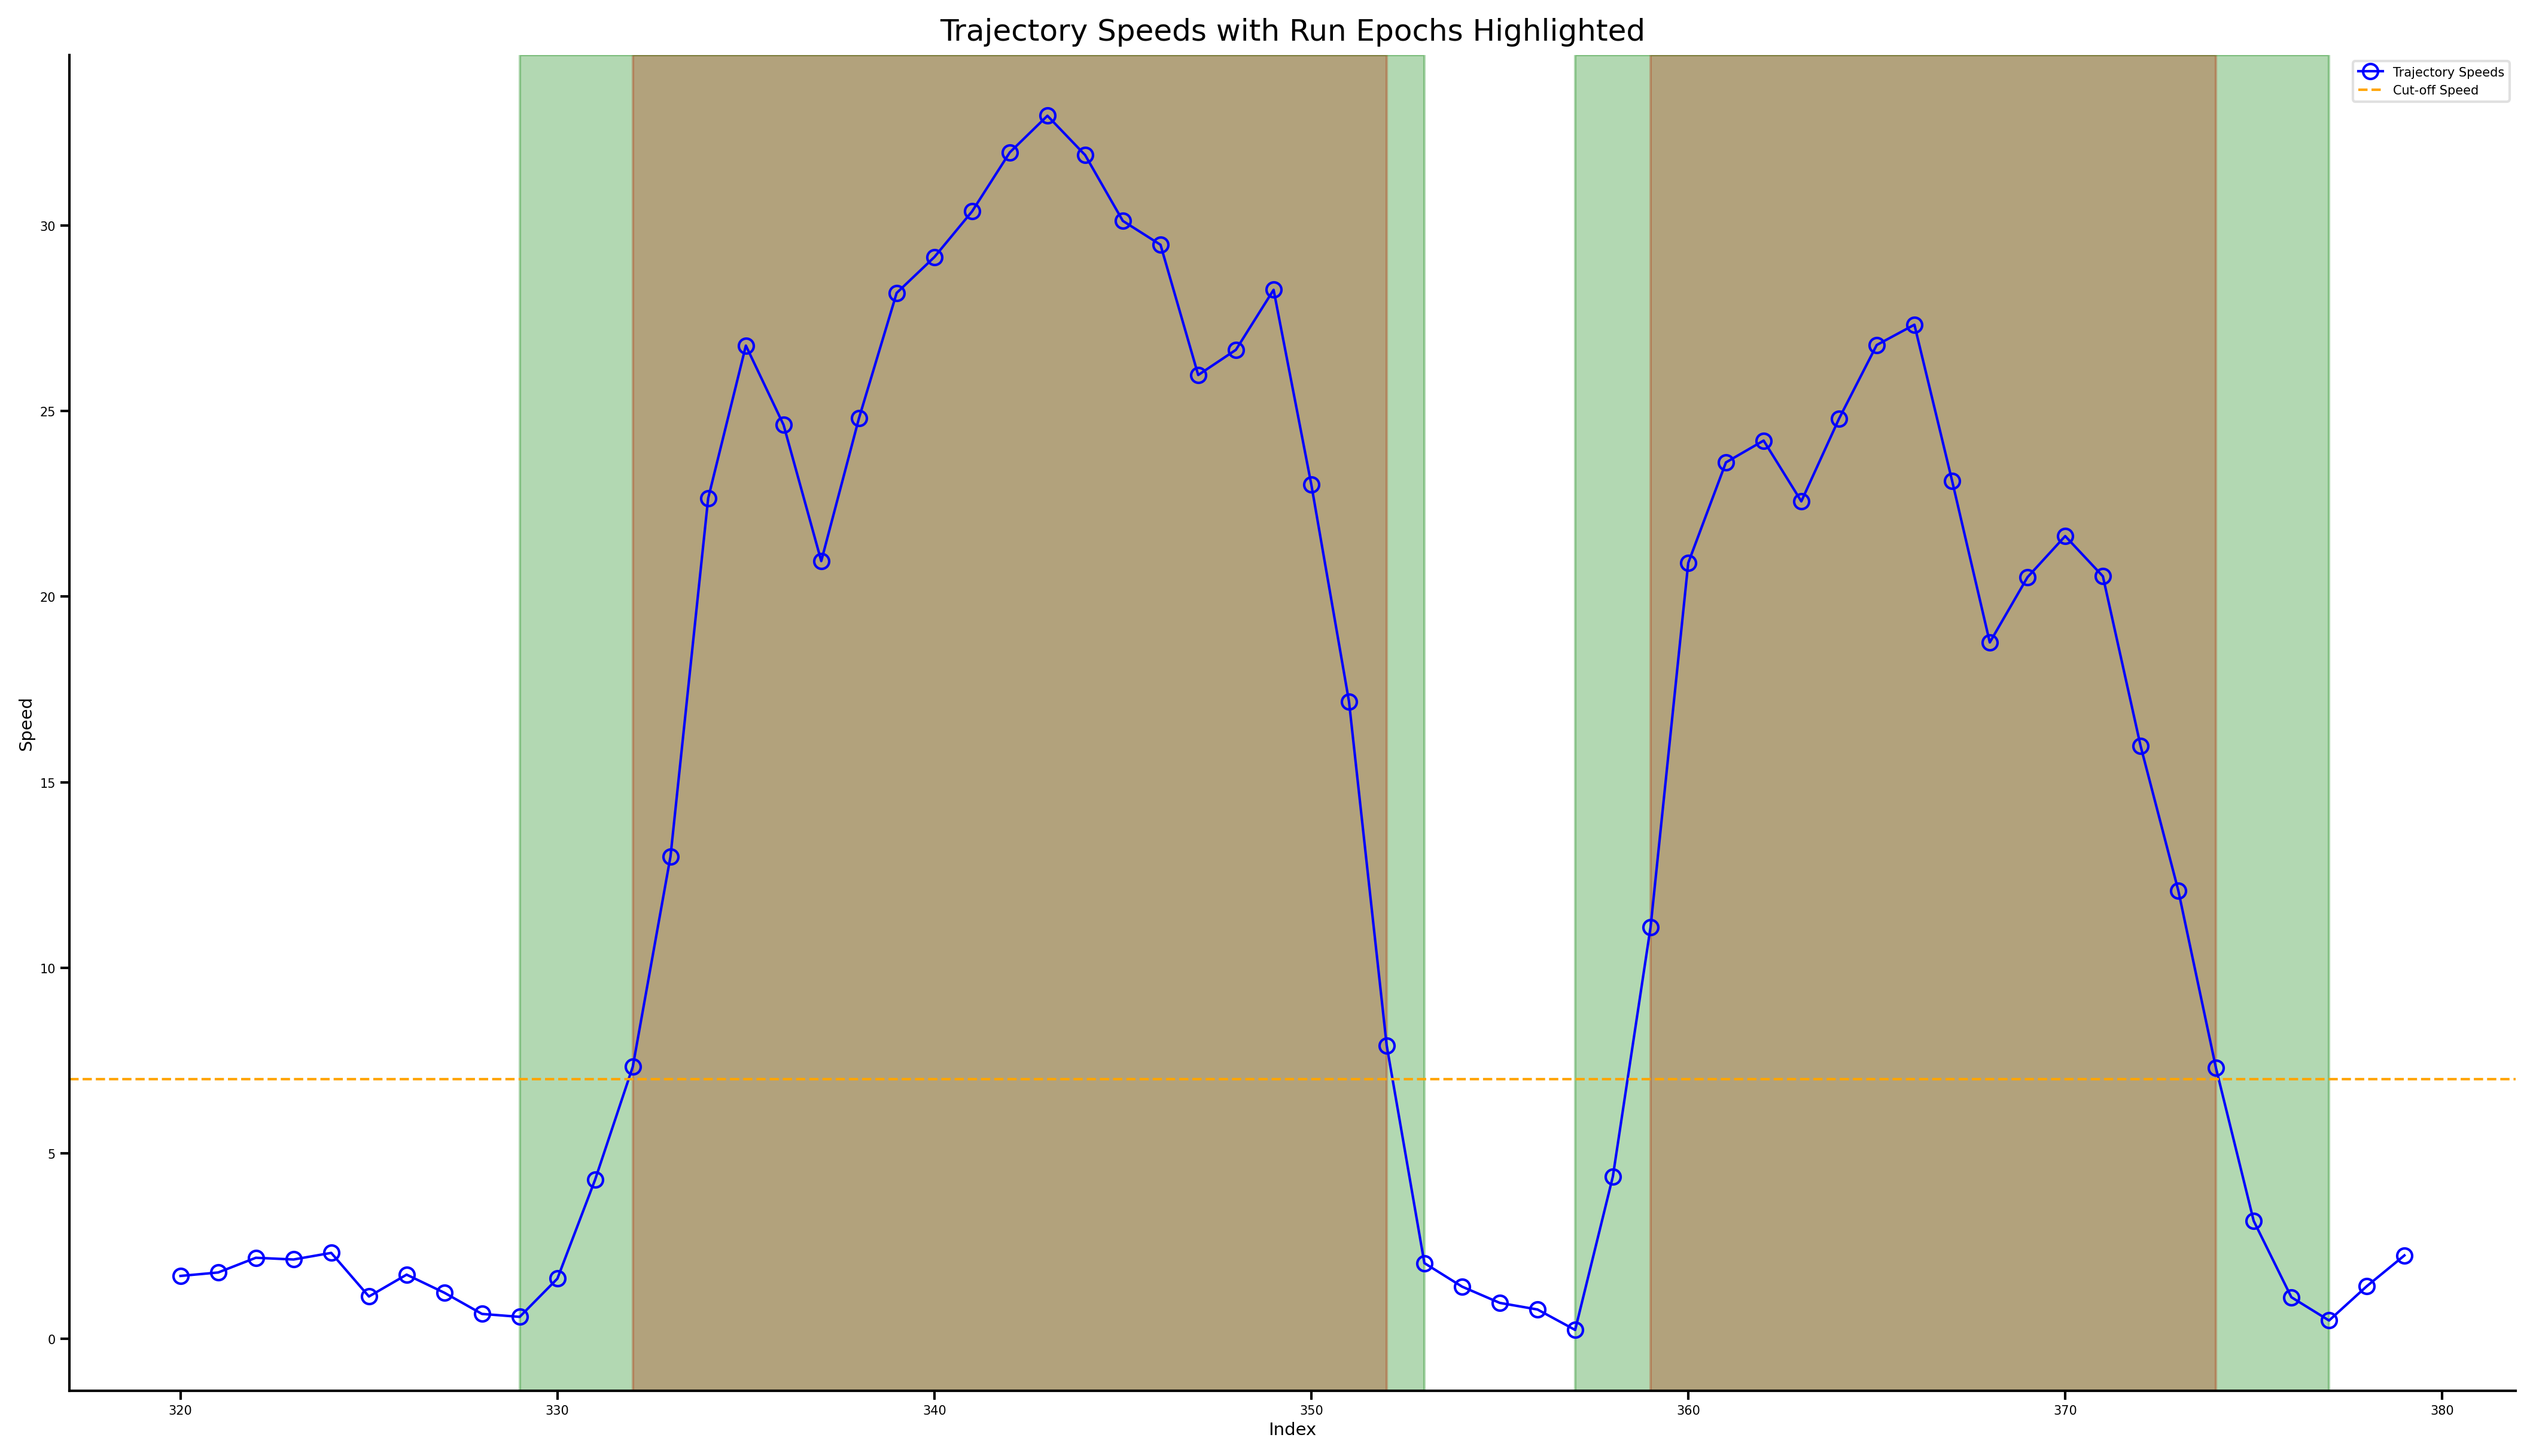

In [27]:
plot_trajectory_chunk(320, 380, trajectory_speeds, run_epochs, clean_run_epochs,cut_off_speed=7)